In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-classification-finetuning/sample_submission.csv
/kaggle/input/llm-classification-finetuning/train.csv
/kaggle/input/llm-classification-finetuning/test.csv


In [2]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import ast

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df = pd.read_csv("/kaggle/input/llm-classification-finetuning/train.csv")
test_df = pd.read_csv("/kaggle/input/llm-classification-finetuning/test.csv")

train_df["train_test"] = 1
test_df["train_test"] = 0
full_df = pd.concat([train_df, test_df])

In [4]:
prompt = full_df[full_df["id"] == 30192]["prompt"].values[0]
first_prompt = ast.literal_eval(prompt)[0]

response_model_a = full_df[full_df["id"] == 30192]["response_a"].values[0]
first_response_model_a = ast.literal_eval(response_model_a)[0]

response_model_b = full_df[full_df["id"] == 30192]["response_b"].values[0]
first_response_model_b = ast.literal_eval(response_model_b)[0]

print(f"Prompt: {first_prompt}\n")
print("==================== Response from gpt-4-1106-preview [WINNING MODEL] ====================")
print(f"{first_response_model_a}\n")
print("==================== Response from gpt-4-0613 ====================")
print(f"{first_response_model_b}")

Prompt: Is it morally right to try to have a certain percentage of females on managerial positions?

==================== Response from gpt-4-1106-preview [WINNING MODEL] ====================
The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.

Here are some arguments in favor of and against such policies:

**Arguments in favor:**

1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.

2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.

3. **Equali

In [5]:
prompt = full_df[full_df["id"] == 30192]["prompt"].values[0]
second_prompt = ast.literal_eval(prompt)[1]

response_model_a = full_df[full_df["id"] == 30192]["response_a"].values[0]
second_response_model_a = (
    ast
    .literal_eval(response_model_a)[1]
    .encode('utf-8', 'replace')
    .decode('utf-8')
)

response_model_b = full_df[full_df["id"] == 30192]["response_b"].values[0]
second_response_model_b = (
    ast
    .literal_eval(response_model_b)[1]
    .encode('utf-8', 'replace')
    .decode('utf-8')
)

print(f"Prompt: {second_prompt}\n")
print("==================== Response from gpt-4-1106-preview [WINNING MODEL] ====================")
print(f"{second_response_model_a}\n")
print("==================== Response from gpt-4-0613 ====================")
print(f"{second_response_model_b}")

Prompt: OK, does pineapple belong on a pizza? Relax and give me fun answer.

==================== Response from gpt-4-1106-preview [WINNING MODEL] ====================
Ah, the age-old culinary conundrum that has divided nations and dinner tables: does pineapple belong on a pizza? The tropical twist of pineapple on pizza, known as Hawaiian pizza, is a hotly debated topic where taste buds battle and pizza purists protest.

Let's slice into the debate with a zest of fun:

**Team Pineapple:** "Absolutely, yes! Pineapple on pizza is like a beach party in your mouth. The sweet juiciness of pineapple chunks frolicking with savory ham or bacon creates a flavor wave that surfs across the cheesy ocean of deliciousness. It's the Mardi Gras of pizzas, where sweet meets savory in a jubilant jamboree!"

**Team No-Pineapple:** "No way, not in a million pizzas! Pineapple is a fruit that should be sunbathing on a tropical fruit platter, not freeloading on a sacred slice of pizza. The thought of warm, m

In [6]:
full_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,train_test
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1.0,0.0,0.0,1
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0.0,1.0,0.0,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0.0,0.0,1.0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1.0,0.0,0.0,1
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0.0,1.0,0.0,1


In [7]:
winner_counts = full_df[["winner_model_a", "winner_model_b", "winner_tie"]].sum()
winner_counts

winner_model_a    20064.0
winner_model_b    19652.0
winner_tie        17761.0
dtype: float64

<Axes: title={'center': 'Distribution of preferred responses'}>

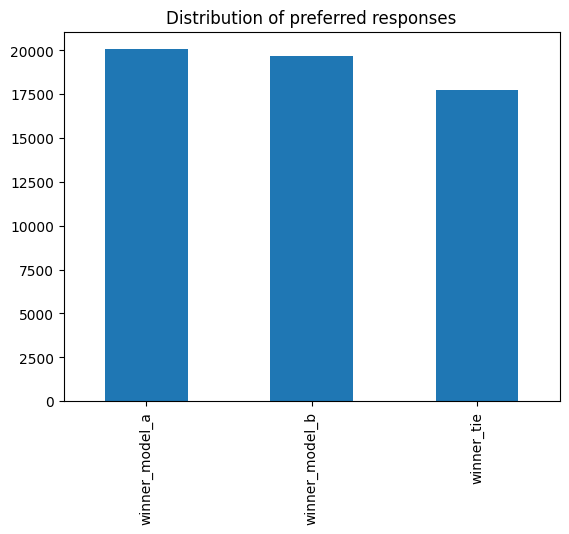

In [8]:
winner_counts.plot(kind="bar", title="Distribution of preferred responses")

In [9]:
model_stats = (
    pd
    .concat([full_df.groupby('model_a')['winner_model_a'].sum(),
             full_df.groupby('model_b')['winner_model_b'].sum()], axis=1)
    .fillna(0)
    .sum(axis=1)
    .sort_values(ascending=False)
)

In [10]:
model_stats

gpt-4-1106-preview          4073.0
gpt-4-0613                  2450.0
gpt-3.5-turbo-0613          2381.0
gpt-4-0314                  1993.0
claude-1                    1747.0
                             ...  
chatglm2-6b                   73.0
openchat-3.5-0106             63.0
qwen1.5-7b-chat               51.0
qwen1.5-4b-chat               35.0
mistral-7b-instruct-v0.2      27.0
Length: 64, dtype: float64

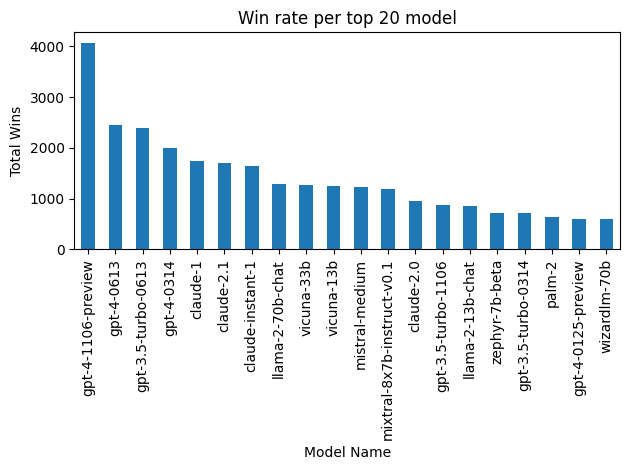

In [11]:
top_20 = (
    model_stats
    .head(20)
    .plot(kind="bar")
)

top_20.set_xlabel("Model Name")
top_20.set_ylabel("Total Wins")
top_20.set_title("Win rate per top 20 model")

plt.tight_layout()
plt.show()

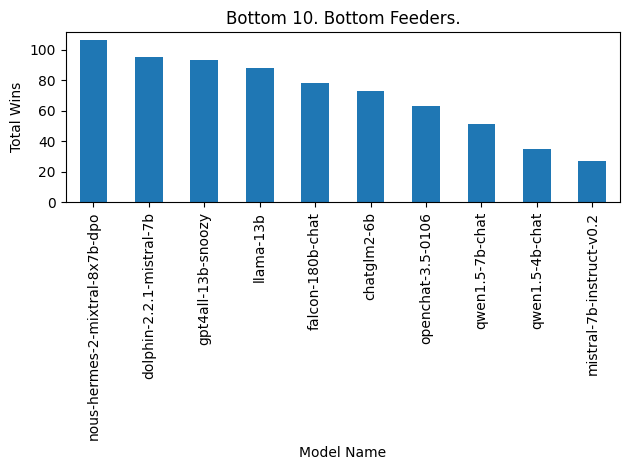

In [12]:
bottom10 = (
    model_stats
    .tail(10)
    .plot(kind="bar")
)

bottom10.set_xlabel("Model Name")
bottom10.set_ylabel("Total Wins")
bottom10.set_title("Bottom 10. Bottom Feeders.")

plt.tight_layout()
plt.show()

## Readability Scores

Goal:
- Compare readability scores between `response_a` and `response_b`
- See if winning responses (by `winner_model_a`, `winner_model_b`) tend to have higher/lower readability

In [13]:
!pip install textstat

In [16]:
import textstat
def get_readability_metrics(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'automated_readability_index': textstat.automated_readability_index(text)
    }

In [17]:
readability_a = full_df['response_a'].apply(get_readability_metrics).apply(pd.Series)
readability_b = full_df['response_b'].apply(get_readability_metrics).apply(pd.Series)

In [18]:
readability_a.columns = [f"{col}_a" for col in readability_a.columns]
readability_b.columns = [f"{col}_b" for col in readability_b.columns]

In [19]:
df = pd.concat([full_df, readability_a, readability_b], axis=1)

In [20]:
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,train_test,flesch_reading_ease_a,flesch_kincaid_grade_a,gunning_fog_a,smog_index_a,automated_readability_index_a,flesch_reading_ease_b,flesch_kincaid_grade_b,gunning_fog_b,smog_index_b,automated_readability_index_b
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1.0,0.0,0.0,1,28.692134,14.350122,16.980488,15.903189,16.699466,50.653529,10.417451,12.486275,12.457976,10.227500
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0.0,1.0,0.0,1,45.770466,14.203889,16.244444,14.150737,16.187006,43.998325,11.618188,13.370617,12.970525,12.851119
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0.0,0.0,1.0,1,58.514347,9.258918,12.670149,12.384807,13.600870,48.466431,11.004059,13.282745,12.688353,13.777167
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1.0,0.0,0.0,1,32.687851,15.357896,19.152836,17.180598,15.230019,51.943255,10.716671,13.760108,13.371157,11.104399
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0.0,1.0,0.0,1,54.750870,11.336522,13.721739,12.857556,11.879348,45.039857,10.765697,13.968852,13.227904,11.327869


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

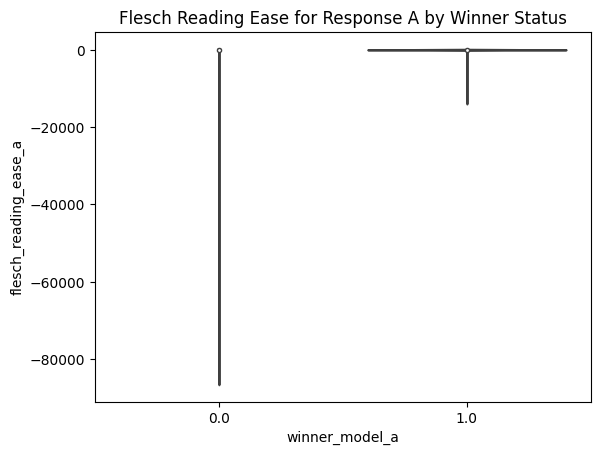

In [24]:
sns.violinplot(data=df, x="winner_model_a", y="flesch_reading_ease_a")
plt.title("Flesch Reading Ease for Response A by Winner Status")
plt.show()

In [26]:
df['winner'] = df[['winner_model_a', 'winner_model_b', 'winner_tie']].idxmax(axis=1)

/tmp/ipykernel_79/2465173297.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['winner'] = df[['winner_model_a', 'winner_model_b', 'winner_tie']].idxmax(axis=1)


In [27]:
winning_readability = []
for row in df.itertuples():
    if row.winner == 'winner_model_a':
        winning_readability.append(row.flesch_reading_ease_a)
    elif row.winner == 'winner_model_b':
        winning_readability.append(row.flesch_reading_ease_b)
    else:
        winning_readability.append((row.flesch_reading_ease_a + row.flesch_reading_ease_b) / 2)

In [28]:
df['winning_readability'] = winning_readability
print(df['winning_readability'].describe())

count     57480.000000
mean         30.133087
std         887.087926
min     -173139.580000
25%          32.982751
50%          47.453581
75%          62.576611
max         121.220000
Name: winning_readability, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


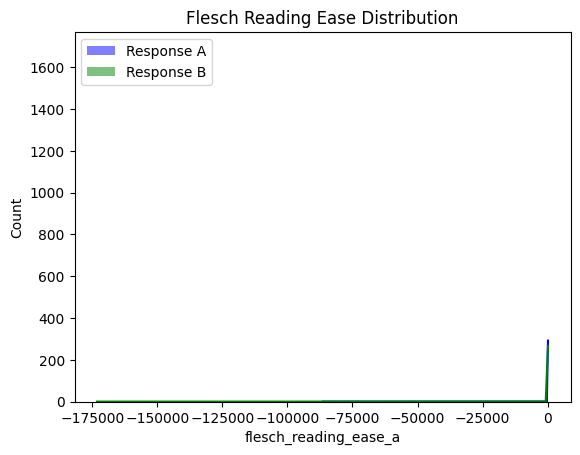

In [29]:
sns.histplot(df['flesch_reading_ease_a'], color='blue', label='Response A', kde=True)
sns.histplot(df['flesch_reading_ease_b'], color='green', label='Response B', kde=True)
plt.title("Flesch Reading Ease Distribution")
plt.legend()
plt.show()

## Response Quality

In [30]:
def response_metrics(text):
    if not isinstance(text, str) or not text.strip():
        return {
            'char_count': 0,
            'word_count': 0,
            'unique_word_count': 0,
            'lexical_diversity': 0,
            'avg_word_length': 0,
            'sentence_count': 0
        }
    
    words = re.findall(r'\b\w+\b', text.lower())
    sentences = re.split(r'[.!?]+', text)
    word_count = len(words)
    unique_words = set(words)
    
    return {
        'char_count': len(text),
        'word_count': word_count,
        'unique_word_count': len(unique_words),
        'lexical_diversity': len(unique_words) / word_count if word_count else 0,
        'avg_word_length': np.mean([len(w) for w in words]) if words else 0,
        'sentence_count': len([s for s in sentences if s.strip()])
    }

In [31]:
metrics_a = full_df['response_a'].apply(response_metrics).apply(pd.Series).add_suffix('_a')
metrics_b = full_df['response_b'].apply(response_metrics).apply(pd.Series).add_suffix('_b')

In [32]:
quality_df = pd.concat([df, metrics_a, metrics_b], axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


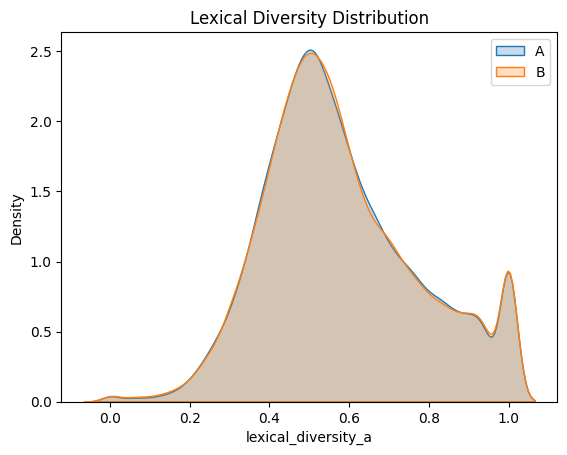

In [36]:
sns.kdeplot(quality_df['lexical_diversity_a'], label='A', fill=True)
sns.kdeplot(quality_df['lexical_diversity_b'], label='B', fill=True)
plt.title('Lexical Diversity Distribution')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


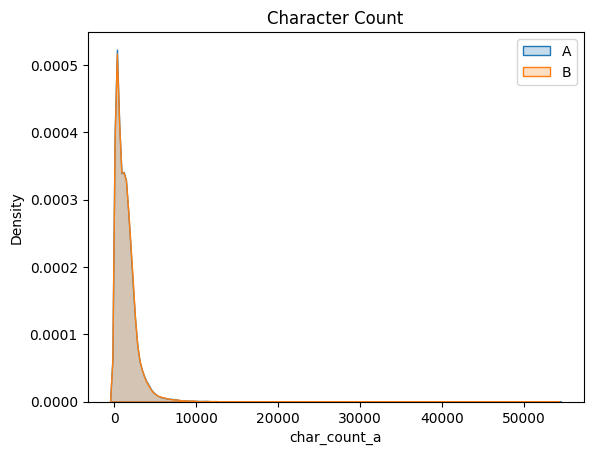

In [37]:
sns.kdeplot(quality_df['char_count_a'], label='A', fill=True)
sns.kdeplot(quality_df['char_count_b'], label='B', fill=True)
plt.title('Character Count')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


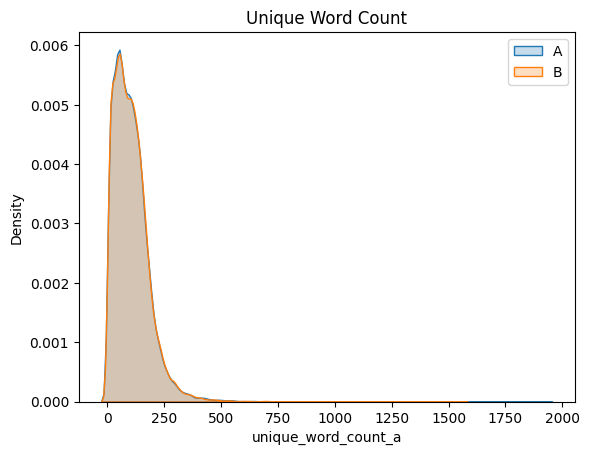

In [38]:
sns.kdeplot(quality_df['unique_word_count_a'], label='A', fill=True)
sns.kdeplot(quality_df['unique_word_count_b'], label='B', fill=True)
plt.title('Unique Word Count')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


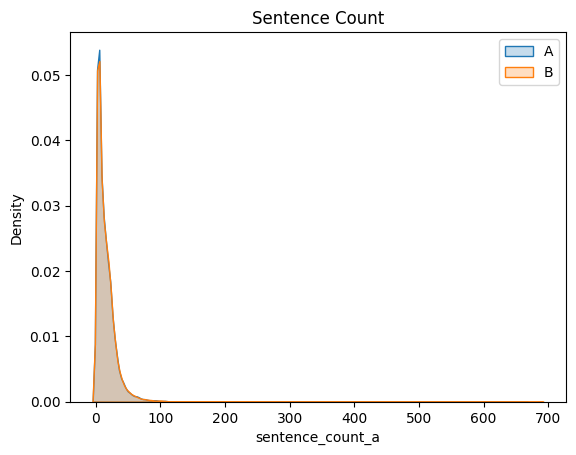

In [41]:
sns.kdeplot(quality_df['sentence_count_a'], label='A', fill=True)
sns.kdeplot(quality_df['sentence_count_b'], label='B', fill=True)
plt.title('Sentence Count')
plt.legend()
plt.show()